<IPython.core.display.Javascript object>


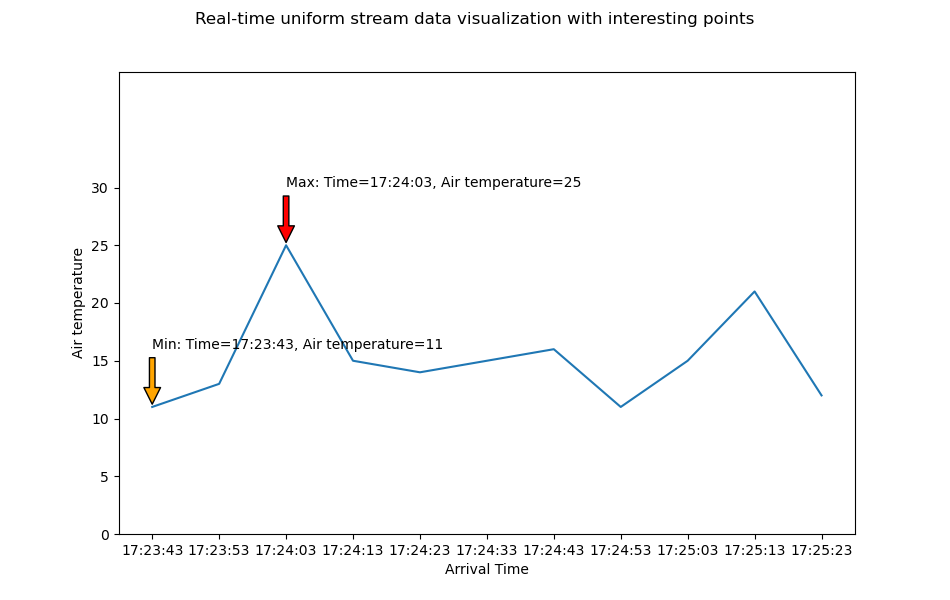

['01/03/24', 'producer1 ', '-37.34 ', '143.123 ', '19 / 52.8 / 12.5 / 21.0 /  0.47G / 159']
['01/04/24', 'producer1 ', '-37.59 ', '149.31 ', '19 / 57.2 / 8.9 / 15.0 /  0.98G / 153']
['01/05/24', 'producer1 ', '-36.748 ', '144.168 ', '11 / 48.2 / 10.8 / 22.9 /  0.59G / 96']
['01/06/24', 'producer1 ', '-37.719 ', '142.154 ', '13 / 47.0 / 7.9 / 15.0 /  0.02G / 114']
['01/07/24', 'producer1 ', '-36.942 ', '143.282 ', '25 / 58.3 / 7.1 / 13.0 /  0.00I / 199']
['01/08/24', 'producer1 ', '-36.8264 ', '142.6138 ', '15 / 48.2 / 14.7 / 25.1 /  0.43G / 131']
['01/09/24', 'producer1 ', '-37.618 ', '143.0013 ', '14 / 36.0 / 15.9 / 22.0 /  0.00I / 134']
['01/10/24', 'producer1 ', '-37.926 ', '144.0898 ', '15 / 51.0 / 9.0 / 13.0 /  1.26G / 128']
['01/11/24', 'producer1 ', '-36.341 ', '143.636 ', '16 / 47.5 / 5.4 / 12.0 /  0.00I / 140']
['01/12/24', 'producer1 ', '-37.365 ', '148.052 ', '11 / 43.8 / 6.5 / 12.0 /  0.02G / 99']
['01/13/24', 'producer1 ', '-36.8264 ', '142.6138 ', '15 / 48.2 / 14.7 / 25.1

KeyboardInterrupt: 

In [8]:
# streaming data visualisation
from time import sleep
from kafka3 import KafkaConsumer
import datetime as dt
import matplotlib.pyplot as plt

# this line is needed for the inline display of graphs in Jupyter Notebook
%matplotlib notebook

topic = 'Main_Stream'
hostip = "192.168.0.130" # change it to your IP


def annotate_max(x, y, ax = None):
    ymax = max(y)
    xpos = y.index(ymax) 
    xmax = x[xpos]
    text = 'Max: Time={}, Air temperature={}'.format(xmax, ymax)
    if not ax:
        # get current axes
        ax=plt.gca()
        
        
    # to add annotation to a plot
    # "xy" is just to specify the location of the point
    # "xytext" specifies the location of the text of the arrow
    # "arrowprops" specifies the properties of the arrow
    ax.annotate(text, xy=(xmax, ymax), xytext=(xmax, ymax+5), arrowprops=dict(facecolor='red', shrink=0.05),)
    
def annotate_min(x, y, ax = None):
    ymin = min(y)
    xpos = y.index(ymin)
    xmin = x[xpos]
    text = 'Min: Time={}, Air temperature={}'.format(xmin, ymin)
    if not ax:
        ax=plt.gca()
        
    ax.annotate(text, xy=(xmin, ymin), xytext=(xmin, ymin+5), arrowprops=dict(facecolor='orange', shrink=0.05),)

def connect_kafka_consumer():
    _consumer = None
    try:
         _consumer = KafkaConsumer(topic,
                                   consumer_timeout_ms=20000, # stop iteration if no message after 10 sec
                                   #auto_offset_reset='earliest', # comment this if you don't want to consume earliest available message
                                   bootstrap_servers=[f'{hostip}:9092'],
                                   api_version=(0, 10))
    except Exception as ex:
        print('Exception while connecting Kafka')
        print(str(ex))
    finally:
        return _consumer

def init_plots():
    try:
        width = 9.5
        height = 6
        fig = plt.figure(figsize=(width,height)) # create new figure
        ax = fig.add_subplot(111) # adding the subplot axes to the given grid position Three integers (nrows, ncols, index).Index starts at 1 in the upper left corner and increases to the right.
        fig.suptitle('Real-time uniform stream data visualization with interesting points') # giving figure a title at top
        ax.set_xlabel('Arrival Time')
        ax.set_ylabel('Air temperature')
        ax.set_ylim(0,40) # Set the y-axis view limits.
        ax.set_yticks([0,5,10,15,20,25,30]) # is used to Set the y-axes ticks with list of ticks.
        fig.show() # displaying the figure
        fig.canvas.draw() # drawing on the canvas
        return fig, ax
    except Exception as ex:
        print(str(ex))
    
def consume_messages(consumer, fig, ax):
    try:
        # container for x and y values
        x, y = [], []
        # print('Waiting for messages')
        for message in consumer:
            data = str(message.value.decode('utf-8')).split(', ') # result is e.g. ['12:32:24', '45']
            data_subset = data[-1].split('/')
            print(data)
            currenttime = str(dt.datetime.now().strftime("%X"))
            x.append(currenttime) 
            y.append(int(data_subset[0]))
            # print(y)
            # we start plotting only when we have 10 data points
            if len(y) > 10: 
                ax.clear()
                ax.plot(x, y)
                ax.set_xlabel('Arrival Time')
                ax.set_ylabel('Air temperature')
                ax.set_ylim(0,40) # Set the y-axis view limits.
                ax.set_yticks([0,5,10,15,20,25,30]) # is used to Set the y-axes ticks with list of ticks.
                #print(ax)
                annotate_max(x,y, ax)
                annotate_min(x,y, ax)
                fig.canvas.draw()
                x.pop(0) # removing the item in the first position
                y.pop(0)
        plt.close('all')
    except Exception as ex:
        print(str(ex))
    
if __name__ == '__main__':
    
    consumer = connect_kafka_consumer()
    fig, ax = init_plots()
    consume_messages(consumer, fig, ax)
    
# need to wait around 100 seconds for graph to show line

['16:19:20', '16:29:38', '16:23:02', '16:27:20', '16:24:21', '16:25:36', '16:29:02', '16:24:38', '16:20:47', '16:20:57', '16:20:52', '16:14:45', '16:19:03', '16:30:08', '16:20:32', '16:31:08', '16:16:00', '16:18:13', '16:20:24', '16:28:10', '16:20:45', '16:21:38', '16:15:46', '16:17:55', '16:14:59', '16:21:32', '16:19:22', '16:21:37', '16:22:56', '16:16:57', '16:18:38', '16:18:37', '16:15:19', '16:30:51', '16:24:24', '16:22:22', '16:29:16', '16:32:31', '16:32:36', '16:31:43', '16:32:50', '16:29:48', '16:14:36', '16:32:47', '16:18:08', '16:29:21', '16:33:48', '16:17:06', '16:28:19', '16:26:45', '16:24:01', '16:16:47', '16:14:49', '16:32:05', '16:32:21', '16:25:30', '16:27:40', '16:31:53', '16:20:17', '16:27:13', '16:33:03', '16:29:18', '16:26:03', '16:16:07', '16:15:41', '16:23:16', '16:18:05', '16:18:53', '16:14:08', '16:27:14', '16:15:32', '16:31:33', '16:22:38', '16:20:37', '16:21:48', '16:17:43', '16:25:56', '16:28:44', '16:14:23', '16:29:47', '16:32:10', '16:22:28', '16:28:51', '16

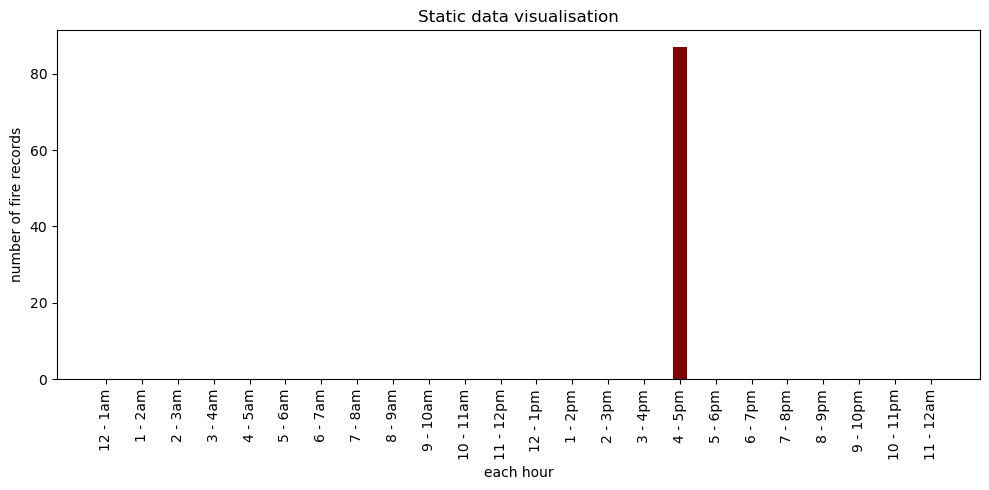

In [2]:
#Plot a bar chart to visualise the total number of fire records based on each hour

from pprint import pprint
import pandas as pd
import pymongo
from pymongo import MongoClient
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt 


client = MongoClient('192.168.0.130', 27017) 
db = client.fit3182_db
collection = db.Main_Stream
hotspot_time_list = []
hour_list = []

res = collection.find({})

for dictionary in res:
    if 'hotspot' in dictionary.keys():
        for hotspot in dictionary['hotspot']:
            if 'time' in hotspot.keys():
                hotspot_time_list.append(hotspot['time'])
            else:
                hotspot_time_list.append(hotspot['merged_time'])
            

  
# creating the dataset
time = ['12 - 1am', '1 - 2am', '2 - 3am', '3 - 4am', '4 - 5am', '5 - 6am', '6 - 7am', '7 - 8am', '8 - 9am', '9 - 10am',
       '10 - 11am', '11 - 12pm', '12 - 1pm', '1 - 2pm', '2 - 3pm', '3 - 4pm', '4 - 5pm', '5 - 6pm', '6 - 7pm', '7 - 8pm',
       '8 - 9pm', '9 - 10pm', '10 - 11pm', '11 - 12am']

values = [0 for i in range(24)]

for item in hotspot_time_list:
    val = item.split(":")
    hour_list.append(val[0])
    
print(hotspot_time_list)
    
for item in hour_list:
    values[int(item)] += 1
  
fig = plt.figure(figsize = (10, 5), tight_layout=True)
 
# creating the bar plot
plt.bar(time, values, color ='maroon', 
        width = 0.4)
 
plt.xlabel("each hour")
plt.ylabel("number of fire records")
plt.title("Static data visualisation")
plt.xticks(rotation=90)
plt.show()

            
# the output for the bar chart will have very little variance because producer for hotspot_TERRA_streaming and hotspot_AQUA_streaming only have difference of 20 minutes for each data produced

In [9]:
import folium
from pymongo import MongoClient
host_ip = "192.168.0.130"

client = MongoClient(host_ip, 27017)
db = client.fit3182_db
collection = db.Main_Stream
# Preparing the data for plotting
res = []

# Looping through all the data
for dictionary in collection.find():
    #pprint(row)
    if 'hotspot' in dictionary.keys():
        for hotspot in dictionary['hotspot']:
            if 'surface_temperature_celcius' in hotspot.keys():
                res.append((hotspot['latitude'], hotspot['longitude'], dictionary['air_temperature_celcius'], hotspot['surface_temperature_celcius'], dictionary['relative_humidity'], hotspot['confidence'], dictionary['cause_of_event']))
            else:
                res.append((hotspot['latitude'], hotspot['longitude'], dictionary['air_temperature_celcius'], hotspot['merged_surface_temperature_celcius'], dictionary['relative_humidity'], hotspot['merged_confidence'], dictionary['cause_of_event']))

avg_latitude = sum([x[0] for x in res]) / len(res)
avg_longitude = sum([x[1] for x in res]) / len(res)

fomap = folium.Map(location=[avg_latitude, avg_longitude], zoom_start=8)
print(res)

for loc in res:
    if loc[-1] == "natural":
        folium.Marker(location= (float(loc[0]), float(loc[1])), popup= f"airtemperature={loc[2]}, surfacetemperature={loc[3]}, relativehumidity={loc[4]}, confidence={loc[5]}").add_to(fomap) # popup is when u click on the marker a popup will show up
    else:
        folium.Marker(location= (float(loc[0]), float(loc[1])), popup= f"airtemperature={loc[2]}, surfacetemperature={loc[3]}, relativehumidity={loc[4]}, confidence={loc[5]}", icon = folium.Icon(color = 'red', icon_color = '#FFFFFF')).add_to(fomap)
    


[(-37.4444, 142.9091, 18, 45, 50.6, 71, 'other'), (-37.4661, 143.2419, 18, 40, 50.6, 58, 'other'), (-37.7845, 142.9936, 18, 60, 50.6, 86, 'other'), (-37.6089, 142.8706, 18, 49, 50.6, 76, 'other'), (-36.1558, 145.9723, 24, 53, 60.1, 80, 'natural'), (-37.8777, 143.371, 18, 54, 61.5, 81, 'other'), (-36.663, 142.8567, 18, 71, 61.5, 92, 'other'), (-37.5963, 142.5999, 18, 46, 61.5, 68, 'other'), (-36.8094, 142.8885, 18, 77, 61.5, 96, 'other'), (-37.7587, 142.8521, 18, 80, 61.5, 84, 'other'), (-36.5775, 142.6076, 18, 50, 61.5, 76, 'other'), (-37.4935, 142.8492, 18, 52, 61.5, 77, 'other'), (-37.5389, 143.1632, 24, 53, 51.8, 57, 'natural'), (-36.9151, 142.0798, 24, 50, 51.8, 77, 'natural'), (-36.6384, 142.4075, 24, 66, 51.8, 90, 'natural'), (-36.7101, 142.3865, 24, 67, 51.8, 90, 'natural'), (-37.472, 148.119, 10, 54, 44.8, 85, 'other'), (-36.1411, 143.5727, 18, 51, 53.8, 78, 'other'), (-36.4426, 140.9954, 10, 57, 43.7, 84, 'other'), (-36.1456, 141.9066, 10, 58, 43.7, 84, 'other'), (-36.3296, 14

In [10]:
fomap